# Importing Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


*  We have 3 files 
  1. fcosts  --  which includes Fleet operational Costs
  2. freight --  Freight and Revenue data
  3. Driver  --  which includes Driver information

* fcosts contains first 2 rows as heading so I skip them.

In [3]:

# Load the file and skip the first 2 rows
df_fcosts = pd.read_excel("C://Users//user//Downloads//archive (4)//fCosts.xlsx", skiprows=2)

# Rename columns for clarity
df_fcosts.columns = [
    "Date", "Truck_ID", "Driver_ID", "KM_Traveled", "Liters",
    "Fuel_Cost", "Maintenance_Cost", "Fixed_Costs"
]

# Ensure Date in df_fcosts is datetime
df_fcosts["Date"] = pd.to_datetime(df_fcosts["Date"], errors='coerce')

# Preview cleaned data
df_fcosts.head()


,Date,Truck_ID,Driver_ID,KM_Traveled,Liters,Fuel_Cost,Maintenance_Cost,Fixed_Costs
0,2018-01-01,2,2,4594,1303.06,4077.49,1011.93,10502.595165
1,2018-01-01,6,4,3816,899.14,2813.7,1561.78,6092.156655
2,2018-01-01,17,9,7116,2128.46,6491,1324.12,11930.90331
3,2018-01-01,19,11,2724,669.73,2123.58,560.17,7428.016155
4,2018-01-01,20,12,3862,723.02,2378.19,648.11,6735.388638


In [4]:
# Load freight data
df_ffreight = pd.read_csv("C://Users//user//Downloads//archive (4)//fFreight.csv")

# Replace commas with dots and convert numeric columns to float
for col in ["Net_Revenue", "Weight(Kg)", "Weight(Cubic)", "Goods_Value"]:
    df_ffreight[col] = df_ffreight[col].astype(str).str.replace(",", ".").astype(float)

# Ensure Date in df_ffreight is datetime
df_ffreight["Date"] = pd.to_datetime(df_ffreight["Date"], errors='coerce')

# Drop rows with invalid dates
df_ffreight = df_ffreight.dropna(subset=["Date"])

# Reset index
df_ffreight.reset_index(drop=True, inplace=True)

# Preview cleaned data
df_ffreight.head()

,Date,Customer_ID,Truck_ID,Invoice_Number,Freight_ID,City,Net_Revenue,Weight(Kg),Weight(Cubic),Goods_Value
0,2018-02-01,10975,38,774571,02/01/2018:MMA-5946,Herrings Crossroads,7.42,2.50,3.0,247.39
1,2018-02-01,22346,23,774507,02/01/2018:MMA-4836,Enders,3.54,2.62,3.0,118.05
2,2018-02-01,12208,23,774516,02/01/2018:MMA-4836,Shavertown,8.98,5.54,9.0,299.01
3,2018-02-01,1929,23,774626,02/01/2018:MMA-4836,Enders,12.49,7.80,9.0,416.27
4,2018-02-01,6198,23,774623,02/01/2018:MMA-4836,Enders,2.49,8.55,9.0,82.90


   *  Merge fCosts with driver info from DimensionTables (on Driver_ID)



In [5]:
# Load driver dimension table
df_driver = pd.read_excel("C://Users//user//Downloads//archive (4)//DimensionTables.xlsx")

# Merge to add driver names
df_costs_full = pd.merge(df_fcosts, df_driver, on="Driver_ID", how="left")


df_costs_full.head()

,Date,Truck_ID,Driver_ID,KM_Traveled,Liters,Fuel_Cost,Maintenance_Cost,Fixed_Costs,Driver
0,2018-01-01,2,2,4594,1303.06,4077.49,1011.93,10502.595165,Ridwan Greaves
1,2018-01-01,6,4,3816,899.14,2813.7,1561.78,6092.156655,Karol Woods
2,2018-01-01,17,9,7116,2128.46,6491,1324.12,11930.90331,Kenzie Macdonald
3,2018-01-01,19,11,2724,669.73,2123.58,560.17,7428.016155,Maheen Nicholls
4,2018-01-01,20,12,3862,723.02,2378.19,648.11,6735.388638,Stevie Schofield


  *  merge fCosts with fFreight (on Date and Truck_ID) to correlate costs with revenue
  
     Prepare this combined data for analysis in Power BI or SQL



 

In [6]:
# Merge fCosts with fFreight on Date & Truck_ID
df = pd.merge(df_costs_full, df_ffreight, on=["Date", "Truck_ID"], how="inner")

# Preview the combined dataset
df.head()


,Date,Truck_ID,Driver_ID,KM_Traveled,Liters,Fuel_Cost,Maintenance_Cost,Fixed_Costs,Driver,Customer_ID,Invoice_Number,Freight_ID,City,Net_Revenue,Weight(Kg),Weight(Cubic),Goods_Value
0,2018-02-01,2,2,4682,1346.76,4205.84,1327.42,10464.817665,Ridwan Greaves,1989,774492,02/01/2018:MJD-6976,Loyce,1792.73,5885.24,8844.00,59757.80
1,2018-02-01,6,4,1007,244.18,755.54,2095.77,6387.821655,Karol Woods,22106,774602,02/01/2018:MHN-5539,Newburg,11.39,5.81,5.81,379.19
2,2018-02-01,6,4,1007,244.18,755.54,2095.77,6387.821655,Karol Woods,22106,774601,02/01/2018:MHN-5539,Newburg,0.46,10.00,10.00,15.20
3,2018-02-01,6,4,1007,244.18,755.54,2095.77,6387.821655,Karol Woods,22106,774599,02/01/2018:MHN-5539,Newburg,1.28,0.66,0.66,42.74
4,2018-02-01,6,4,1007,244.18,755.54,2095.77,6387.821655,Karol Woods,22106,774600,02/01/2018:MHN-5539,Newburg,0.18,0.40,0.40,5.94


# Exploratory Data Analysis

  ## Total Cost per Truck


In [7]:
truck_costs = df.groupby("Truck_ID")[["Fuel_Cost", "Maintenance_Cost", "Fixed_Costs"]].sum().sort_values("Fuel_Cost", ascending=False)
truck_costs

,Fuel_Cost,Maintenance_Cost,Fixed_Costs
Truck_ID,,,
22,661839.24,110981.49,1853464.183633
19,418808.37,63767.97,1022565.2649
23,312020.63,66505.1,964671.147995
20,191929.78,62956.53,1029906.113925
34,188262.59,72970.92,428377.67073
4,182013.05,115361.68,801114.532202
38,147150.29,36397.23,796785.243894
33,119940.77,29634.42,297338.356434
24,100018.62,11651.33,230561.244525


## Total Revenue per Truck

In [8]:
truck_revenue=df.groupby('Truck_ID')["Net_Revenue"].sum().sort_values(ascending=False)
truck_revenue.head()

Truck_ID
2     19577.94
19     7303.71
22     7285.26
3      6861.88
20     5291.01
Name: Net_Revenue, dtype: float64

## Profit per Truck

In [9]:
df["Total_cost"]=df["Fuel_Cost"]+df["Maintenance_Cost"]+df["Fixed_Costs"]
df["Profit"]=df["Total_cost"]-df["Net_Revenue"]

# Profit per truck
truck_profit=df.groupby('Truck_ID')["Profit"].sum().sort_values(ascending=False)
truck_profit.head()

Truck_ID
22    2618999.653633
19      1497837.8949
23    1339092.067995
20    1279501.413925
4     1095638.812201
Name: Profit, dtype: object

# Fuel Efficiency

In [10]:
df_litres=df[df["Liters"]> 0].copy()

df["KM_per_litre"]=df["KM_Traveled"] / df_litres["Liters"]
fuel_efficiency=df.groupby("Truck_ID")["KM_per_litre"].mean().sort_values(ascending=False)
fuel_efficiency

Truck_ID
4     5.939593
20    5.695296
33    5.621184
23    5.545976
37    5.472339
28    5.338013
38    5.245272
22    5.049243
29    5.004311
7     4.620259
24    4.483675
6     4.124007
19    4.090992
34    3.711955
3     3.561585
2     3.385276
36    3.196003
17    2.808452
Name: KM_per_litre, dtype: object

# Top 5 Drivers by Revenue

In [11]:
top=df.groupby('Driver')["Net_Revenue"].sum().sort_values(ascending=False).head(7)
top.head()

Driver
Ridwan Greaves      19577.94
No Driver            7493.49
Maheen Nicholls      7303.71
Yasin Buck           7039.35
Stevie Schofield     4461.35
Name: Net_Revenue, dtype: float64

<Axes: title={'center': 'Top 5 drivers by revenue'}, xlabel='Driver'>

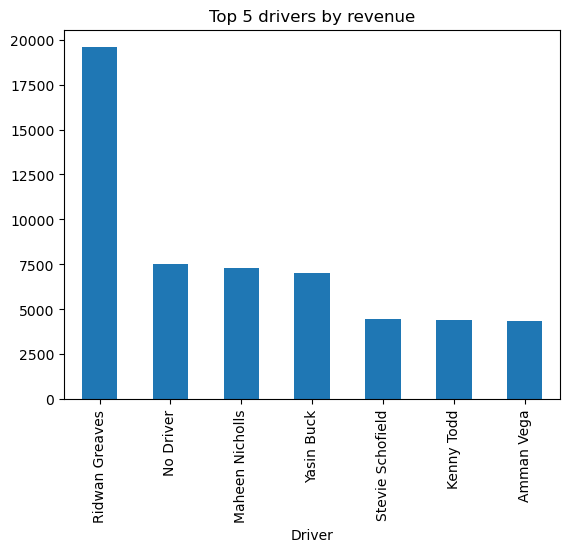

In [12]:
top.plot(kind="bar",title="Top 5 drivers by revenue")

# Top cities by revenue

In [13]:
top_cities=df.groupby("City")["Net_Revenue"].sum().sort_values(ascending=False)
top_cities

City
Mineola                8038.57
Yucca Valley           7462.77
Herrings Crossroads    7128.19
Irving                 6450.08
Wheatland              6311.61
                        ...   
Soradoville               9.65
Dittmer                   8.25
Chancellorsville          7.02
Cave Springs              6.11
Scammon                   2.55
Name: Net_Revenue, Length: 80, dtype: float64

# Top customers by Frieght volume 

## Which customers giving most business

In [14]:
top_cust_kg=df.groupby("Customer_ID")["Weight(Kg)"].sum().sort_values(ascending=False)
top_cust_kg.head(10)

Customer_ID
35476    21143.93
30232     9463.82
10108     8884.80
10101     8702.37
24468     8009.92
21539     6506.40
40077     6361.47
38511     5990.50
1989      5885.24
32551     5800.61
Name: Weight(Kg), dtype: float64

# Monthly Revenue

In [15]:
df["Month"]=df["Date"].dt.to_period("M")

monthly_revenue=df.groupby("Month")["Net_Revenue"].sum().sort_values(ascending=False)
monthly_revenue

Month
2018-10    16141.59
2018-03    10467.54
2018-05     9512.38
2019-07     6039.76
2018-02     5435.42
2019-04     4643.23
2018-09     4451.54
2018-11     4136.59
2018-08     3271.82
2019-02     2629.17
2019-08     2569.50
2018-04     2106.61
2018-12     1627.57
2019-03     1254.49
Freq: M, Name: Net_Revenue, dtype: float64

# Total cost Vs Revenue by month

In [16]:
monthly_data=df.groupby("Month")[["Net_Revenue","Total_cost"]].sum()
monthly_data["Profit"]=monthly_data["Total_cost"]-monthly_data["Net_Revenue"]
monthly_data

,Net_Revenue,Total_cost,Profit
Month,,,
2018-02,5435.42,480832.565621,475397.145621
2018-03,10467.54,1137676.8656,1127209.3256
2018-04,2106.61,929686.667192,927580.057192
2018-05,9512.38,1062953.084871,1053440.704871
2018-08,3271.82,662928.912137,659657.092137
2018-09,4451.54,1185535.636811,1181084.096811
2018-10,16141.59,2740869.866562,2724728.276562
2018-11,4136.59,1472002.72,1467866.13
2018-12,1627.57,1163236.56,1161608.99


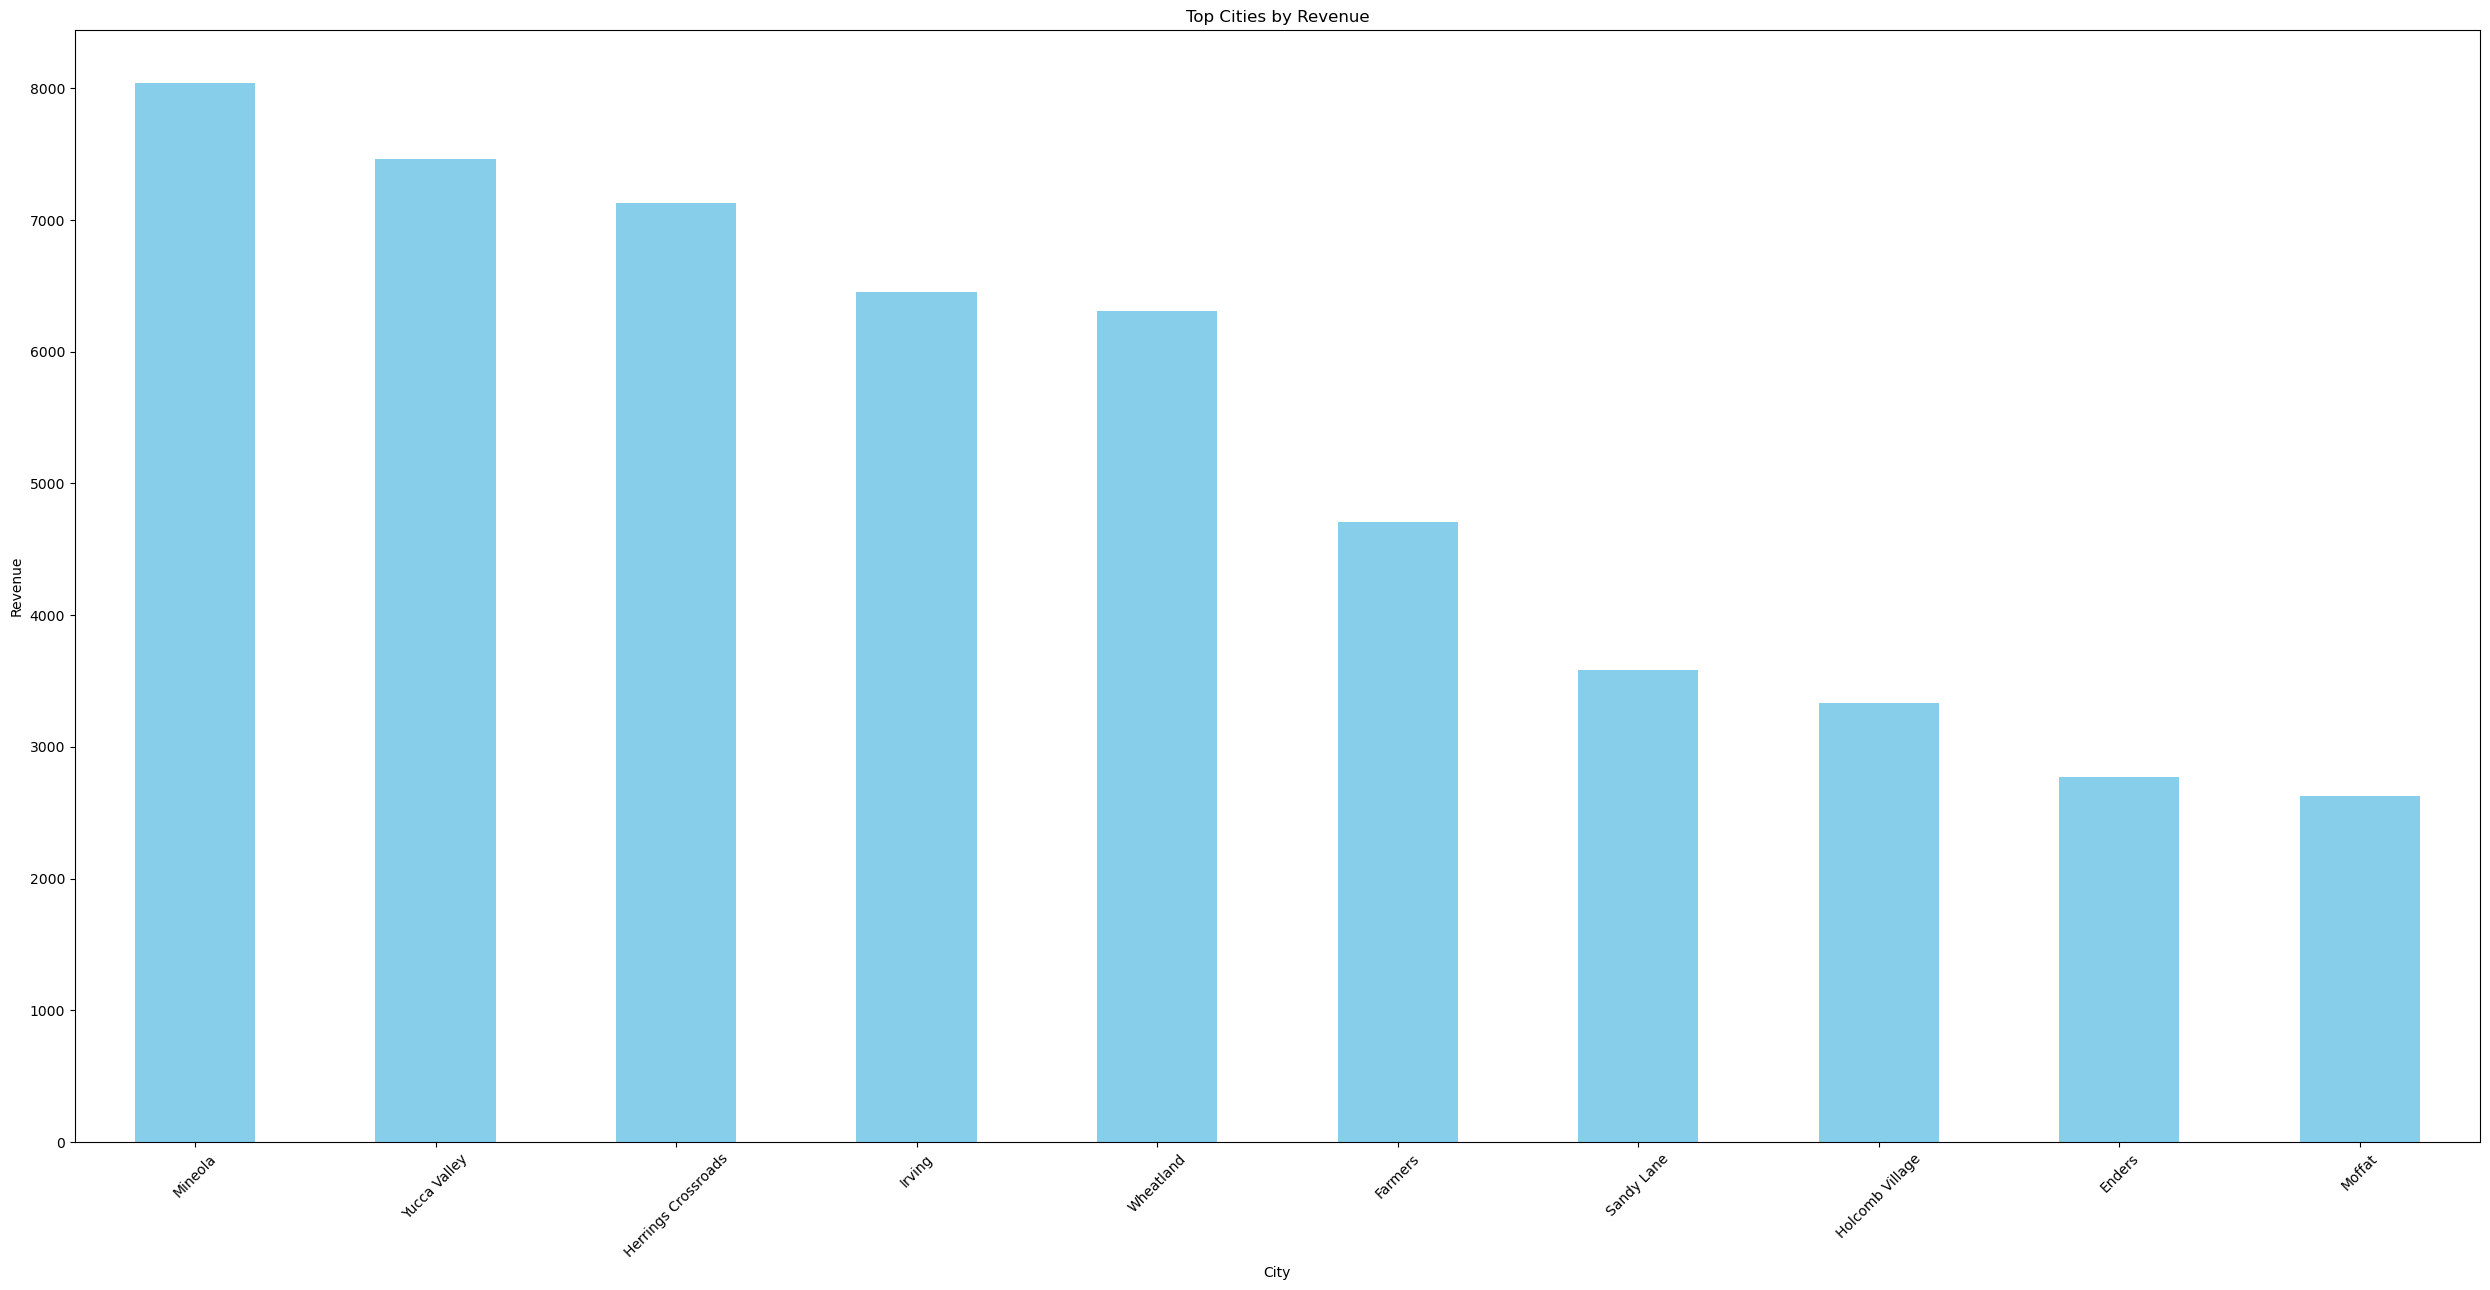

In [17]:
top_cities = df.groupby("City")["Net_Revenue"].sum().sort_values(ascending=False).head(10)

top_cities.plot(kind='bar', color='skyblue', title='Top Cities by Revenue',figsize=(25,13))
plt.ylabel("Revenue")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Connect to MYSQL

In [18]:
!pip install sqlalchemy pymysql


In [19]:
from sqlalchemy import create_engine

#credentials
user = 'root'
password = 'Datamites%40123'
host = 'localhost'
port = 3306
database = 'logistics'

# Create connection string
connection_string = f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}"
engine = create_engine(connection_string)

# Export to SQL table
df.to_sql("freight_data", con=engine, if_exists='replace', index=False)


970